# nmi | spring 2024
## lecture 20 : hyperbolic


### 8.2 hyperbolic equations


hyperbolic equations put less stringent constraints on explicit methods. consider the wave equation.
</br></br>

\begin{align}
  \text{the wave equation}\quad
  \left\{ \quad
    \begin{array}{l}
      u_{tt} = c^2 u_{xx} &\qquad a\le x\le b, t\ge 0 \\
      u(x,0) = f(x) &\qquad a\le x\le b \\
      u_t(x,0) = g(x) &\qquad a\le x\le b \\
      u(a,t) = l(t) &\qquad t\ge 0 \\
      u(b,t) = r(t) &\qquad t\ge 0
    \end{array}
  \right. .
\end{align}
</br>

the wave equation describes the propagation of a wave along $x$ with velocity $c$. if the wave in question is the oscillation of a violin string, $u$ is displacement; if the wave is sound, $u$ is the local air pressure.
</br></br>

for this higher-order derivative, initial velocity $g(x)$ is required in addition to initial shape $f(x)$.
</br>







to apply FDM to the hyperbolic wave equation, back to the grid $x_i = a + ih,t_j = jk$ for step sizes $h,k$ where $w_{ij}$ approximates solution $u(x_i,t_j)$.
</br>


to discretize the wave equation, the second partials are replaced by the centered-difference formula in both $x,t$ directions.
</br></br>

$$\frac{w_{i,j+1}-2w_{ij}+w_{i,j-1}}{k^2} - c^2\frac{w_{i-1,j}-2w_{ij}+w_{i+1,j}}{h^2} = 0.$$
</br>

set $\sigma = \frac{ck}{h}$, we can solve for the solution at the next time step and write the discretized equation as
</br></br>

$$w_{i,j+1} = (2-2\sigma^2)w_{ij} + \sigma^2w_{i-1,j} + \sigma^2w_{i+1,j} - w_{i,j-1}.$$
</br>

bc you need $j,j-1$ use three-point centered difference to approximate the first time derivative of solution $u$.
</br></br>

\begin{align}
  u_t(x_i,t_j) &\approx \frac{w_{i,j+1}-w_{i,j-1}}{2k} \\
  \\
  &\quad\Downarrow \\
  \\
  g(x_i) = u_t(x_i,t_0) &\approx \frac{w_{i1}-w_{i,-1}}{2k} \Rightarrow w_{i,-1} \approx w_{i1} - 2kg(x_i) \\
  \\
  &\quad\Downarrow \\
  \\
  w_{i1} &= (2-2\sigma^2)w_{i0} + \sigma^2w_{i-1,0} + \sigma^2w_{i+1,0} - w_{i1} + 2kg(x_i) \\
  \\
  &\quad\Downarrow \quad\text{algebra!} \\
  \\
  w_{i1} &= (1-\sigma^2)w_{i0} + kg(x_i) + \frac{\sigma^2}{2}(w_{i-1,0} + w_{i+1,0}) \\
  \\
  &\quad\Downarrow
\end{align}  
</br>



$$
A =
\begin{bmatrix}
  2-2\sigma^2 & \sigma^2 & 0 & \dots & 0 \\
  \sigma^2 & 2-2\sigma^2 & \sigma^2 & \ddots & \vdots \\
  0 & \sigma^2 & 2-2\sigma^2 & \ddots & 0 \\
  \vdots & \ddots & \ddots & \ddots & \sigma^2 \\
  0 & \dots & 0 & \sigma^2 & 2-2\sigma^2
\end{bmatrix}
$$
</br>

with initial and subsequent steps
</br></br>

$$
\begin{bmatrix} w_{11} \\ \vdots \\ w_{m1} \end{bmatrix}
= \frac{1}{2}A
\begin{bmatrix} w_{10} \\ \vdots \\ w_{m0} \end{bmatrix}
+ k
\begin{bmatrix} g(x_1) \\ \vdots \\ g(x_m) \end{bmatrix}
+ \frac{1}{2}\sigma^2
\begin{bmatrix} w_{00} \\ 0 \\ \vdots \\ 0 \\ w_{m+1,0} \end{bmatrix}
$$
</br>
$$
\begin{bmatrix} w_{1,j+1} \\ \vdots \\ w_{m,j+1} \end{bmatrix}
= \frac{1}{2}A
\begin{bmatrix} w_{1j} \\ \vdots \\ w_{mj} \end{bmatrix}
-
\begin{bmatrix} w_{1,j-1} \\ \vdots \\ w_{m,j-1} \end{bmatrix}
+ \frac{1}{2}\sigma^2
\begin{bmatrix} w_{0j} \\ 0 \\ \vdots \\ 0 \\ w_{m+1,j} \end{bmatrix}
$$
</br>

and their final form
</br></br>

$$
\begin{bmatrix} w_{11} \\ \vdots \\ w_{m1} \end{bmatrix}
= \frac{1}{2}A
\begin{bmatrix} f(x_1) \\ \vdots \\ f(x_m) \end{bmatrix}
+ k
\begin{bmatrix} g(x_1) \\ \vdots \\ g(x_m) \end{bmatrix}
+ \frac{1}{2}\sigma^2
\begin{bmatrix} l(t_0) \\ 0 \\ \vdots \\ 0 \\ r(t_0) \end{bmatrix}
$$
</br>
$$
\begin{bmatrix} w_{1,j+1} \\ \vdots \\ w_{m,j+1} \end{bmatrix}
= \frac{1}{2}A
\begin{bmatrix} w_{1j} \\ \vdots \\ w_{mj} \end{bmatrix}
-
\begin{bmatrix} w_{1,j-1} \\ \vdots \\ w_{m,j-1} \end{bmatrix}
+ \frac{1}{2}\sigma^2
\begin{bmatrix} l(t_j) \\ 0 \\ \vdots \\ 0 \\ r(t_j) \end{bmatrix}
.$$
</br>


##### example 06


apply FDM to wave equation with $c=2, f(x) = sin\pi x,g(x) = l(t) = r(t) = 0$.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>


```
% example 06 wave eqn ~ mod program 01, heat eqn
% input: space interval [xl,xr], time interval [yb,yt],
% number of space steps M, number of time steps N
% output: solution w
% Example usage: w=wavefd(0,1,0,1,.05,.025) % call by filename
function w=wavefd(xl,xr,yb,yt,h,k)
    f=@(x) sin(pi*x);
    g=@(x) 0*x;
    l=@(t) 0*t;
    r=@(t) 0*t;
    c=2; % velocity
    M=round((xr-xl)/h); N=round((yt-yb)/k); m=M-1; n=N;
    sigma2=(c*k/h)^2;
    % define matrix a
    a=diag(2-2*sigma2*ones(m,1))+diag(sigma2*ones(m-1,1),1);
    a=a+diag(sigma2*ones(m-1,1),-1);
    lside=l(yb+(0:n)*k); rside=r(yb+(0:n)*k);
    % initial conditions
    w(:,1)=f(xl+(1:m)*h)';
    w(:,2)=g(xl+(1:m)*h)'; % just using available space
    % first step
    w(:,2)=a*w(:,1)/2+k*w(:,2)+sigma2/2*[lside(1);zeros(m-2,1);rside(1)];
    % next steps
    for j=2:n
        w(:,j+1)=a*w(:,j)-w(:,j-1)+sigma2*[lside(j);zeros(m-2,1);rside(j)];
    end
    % attach boundary conds
    w=[lside;w;rside];
    x=(0:m+1)*h;t=(0:n)*k;
    mesh(x,t,w')
    % 3-D plot of solution w
    view(60,30);axis([xl xr yb yt -1 1])
end
```



###### code, python


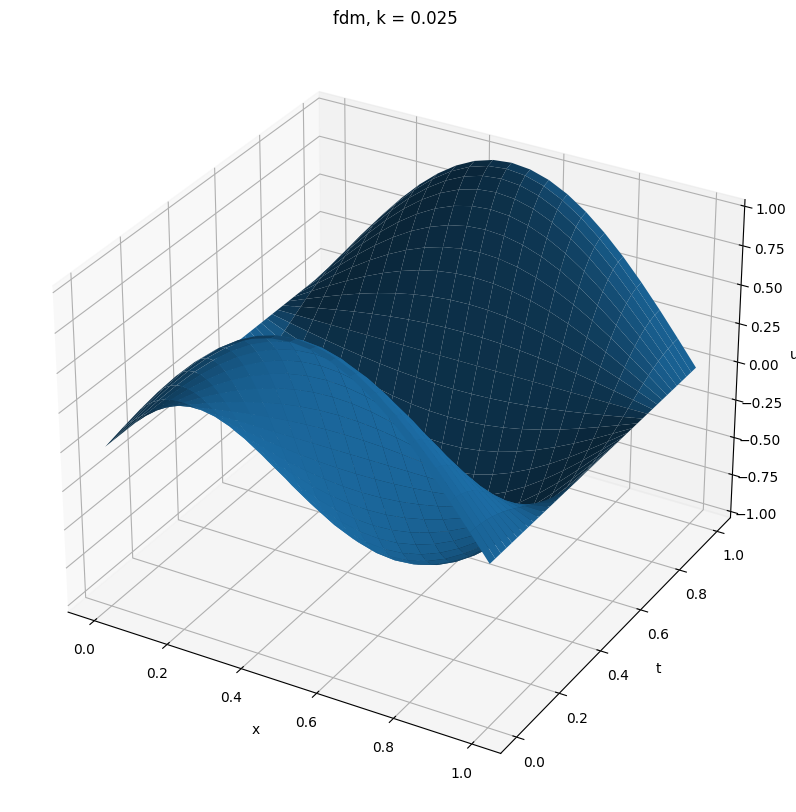

In [ ]:
# example 06 ~ mod program 01

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

# bvp
U = lambda x: np.sin(np.pi*x)
G = lambda x: 0*x
BCL = lambda x,t: 0*t
BCR = lambda x,t: 0*t

# some parms
c = 2   # diffusion constant
h = 0.05  # subintervals, step or count
k = 0.025 # subintervals, step or count

# mesh
x,t = [0,1],[0,1]
M = round((x[1]-x[0])/h) # subinterval size, x
N = round((t[1]-t[0])/k) # subinterval size, t
m = M-1 # interior points [1,m]
n = N   # time steps [1,n] ~ [0,n); however, solution [0,n]
sigma2 = pow(c*k/h,2)

# DF for interior
a = np.zeros((m,m))
a.flat[0::m+1] = 2-2*sigma2              # diagonal
a.flat[1::m+1] = a.flat[m::m+1] = sigma2 # offset

# approx soln

# initialize
ws = np.zeros((m+2,n+1)) # [0:M,0:N]

# bc # the sides of the known U-shape in the mesh
ts = np.linspace(t[0],t[1],n+1)
ws[0,:] = BCL(x[0],ts)
ws[m+1,:] = BCR(x[1],ts)

# ic # the bottom of the known U-shape in the mesh
xs = np.linspace(x[0],x[1],M+1)
ws[:,0] = U(xs) # ic, position

# interior, step 1
ws[:,1] = G(xs) # ic, velocity
ws[1:m+1,1] = np.dot(a,ws[1:m+1,0])/2 + k*ws[1:m+1,1] # influence from ic,iv
ws[1,1] += sigma2*ws[  0,0]/2  # influence from BCL
ws[m,1] += sigma2*ws[m+1,0]/2  # influence from BCR

# interior, step j (in time)
for j in range(1,n): # [0,n)
  ws[1:m+1,j+1] = np.dot(a,ws[1:m+1,j]) - ws[1:m+1,j-1]
  ws[1,j+1] += sigma2*ws[  0,j]/2  # influence from BCL
  ws[m,j+1] += sigma2*ws[m+1,j]/2  # influence from BCR

# plot some
if True:
  x,y = np.meshgrid(xs,ts,indexing='ij') # yep its cartesian vs ij; will adj later
  fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs.set_title("fdm, k = " + str(k))
  axs.plot_surface(x,y,ws)
  axs.set_xlabel("x")
  axs.set_ylabel("t")
  axs.set_zlabel("u")

  plt.show()

if False:
  print(ws[0:21,0:6])


##### usw


however if $k$ is too large relative to $h$, that plot goes to hell.

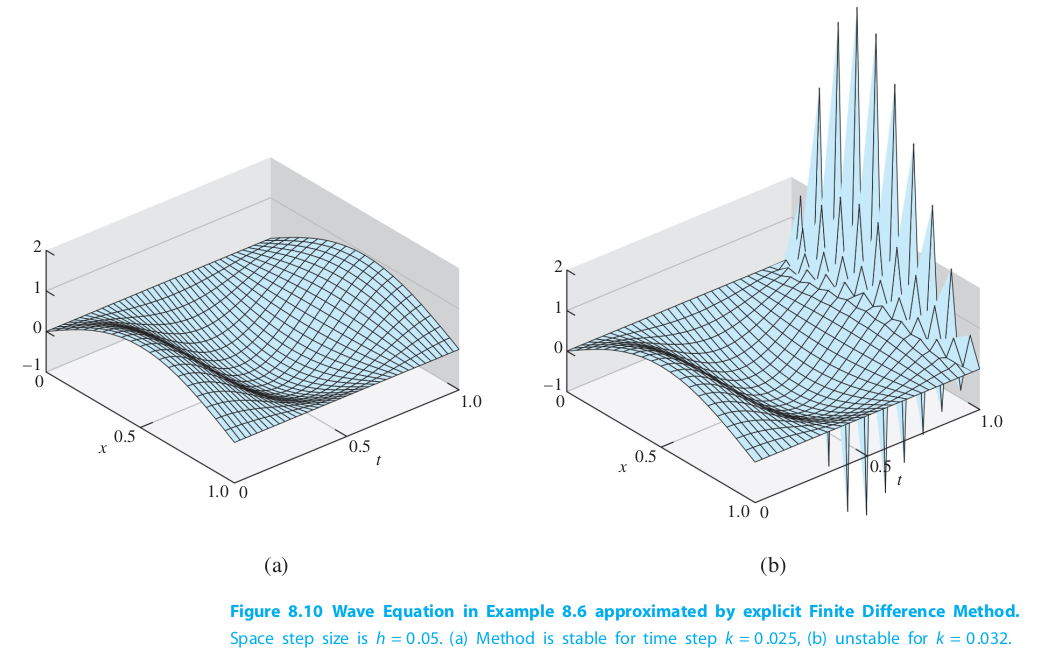

#### 8.1.2 CLF


##### <b><font color=grey>theorem 05</font></b>


FDM applied to the wave equation with speed $c>0$ is stable if $\sigma = \frac{ck}{h}\le 1$.
</br>





###### proof


for steps 2+,
</br></br>

$$\vec{w_{j+1}} = A\vec{w_j}-\vec{w_{j-1}} + \sigma^2\vec{s_j}$$
</br>

where $\vec{s_j}$ are the side conditions. for error magnification, </br></br>

$$
\begin{bmatrix} w_{j+1} \\ w_j \end{bmatrix}
=
\begin{bmatrix} A & -I \\ I & 0 \end{bmatrix}
\begin{bmatrix} w_j \\ w_{j-1} \end{bmatrix}
+ \sigma^2
\begin{bmatrix} s_j \\ 0 \end{bmatrix}
.$$
</br>

ie, error not magnified as long as  eigenvalues of $A' = \begin{bmatrix} A & -I \\ I & 0 \end{bmatrix}$ are bounded by $1$ in absolute value.
</br></br>
let $\lambda \ne 0, (y,z)^T$ be an eigenvalue/eigenvector pair of $A'$ so that
</br></br>

\begin{align}
  \lambda y &= Ay - z \\
  \lambda y &= y \\
  \\
  &\Downarrow \\
  \\
  Ay &= \left( \frac{1}{\lambda} + \lambda \right)y
\end{align}
</br>

so that $\mu = \frac{1}{\lambda} + \lambda$ is an eigenvalue of $A$ and $2-4\sigma^2\le \mu\le 2$. if $\sigma\le 1$, then $-2\le \mu\le 2$. if $\lambda\in \mathcal{C}$, then $\frac{1}{\lambda} + \lambda = \mu\in \mathcal{R}$ and has at most magnitutde $2 \Rightarrow |\lambda| = 1. \enspace\blacksquare$
</br>

##### usw


$\frac{ck}{h}$ is the <b>CFL number</b> of the method, named after courant, friedrichs, lewy (1928). in general CFL must be at most $1$ for solver to be stable. that means if $c$ is wave speed, the distance traveled $ck$ should not exceed the space step $h$. otherwise bad graphs happen. the constraint $ck\le h$ is the <b>CFL condition</b> for the wave equation.
</br>
